# American Sign Language (ASL) is a natural language that serves as the predominant sign language of Deaf communities in the United States and most of Anglophone Canada. Besides North America, dialects of ASL and ASL-based creoles are used in many countries around the world, including much of West Africa and parts of Southeast Asia. ASL is also widely learned as a second language, serving as a lingua franca. ASL is most closely related to French Sign Language

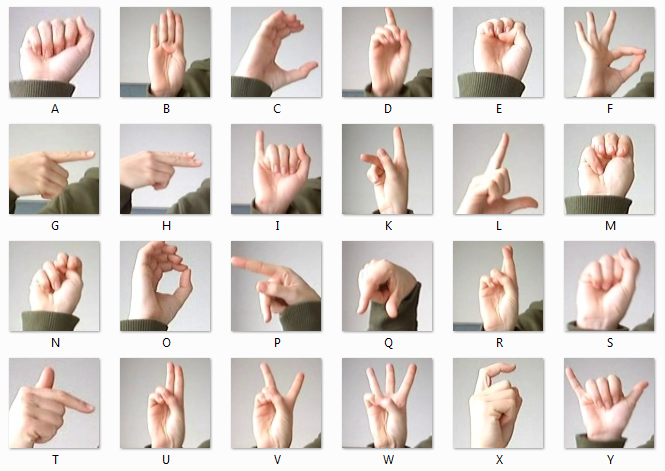

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input/sign-language-mnist"))

# Load the csv file

In [ ]:
train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

# Take a look of train dataset

In [ ]:
train.head()

# Shape of train

In [ ]:
train.shape

# Look at test dataset

In [ ]:
test.head()

# Test data shape

In [ ]:
test.shape

# visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,6))
sns.countplot(train["label"], palette="Set2")

# Here we see that, after 8, comes 10.. so if after inverse labelbinarizer the label shows 9 or greater, then we need to add 1..

# split dataset

In [ ]:
y_train = train["label"]
X_train = train.drop("label", axis=1)

y_test = test["label"]
X_test = test.drop("label", axis=1)

# labelbinarizer convert your label
# think labels = ['A', 'B', 'C'... ...]
# then B will convert like 0 1 0 0 0
# A will convert like 1 0 0 0 0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encode = LabelBinarizer()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

# Train and test values

In [ ]:
X_train = X_train.values

X_test = X_test.values

In [ ]:
X_train

# Normalize the values. By dividing 255, value will convert in range 0 to 1

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
y_train # label binarizer

In [ ]:
X_train # Normalize values

# reshape the array

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape

# some train visualization

In [ ]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# Some test visualization

In [ ]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_test[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# import some necessary packages

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation

## Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks

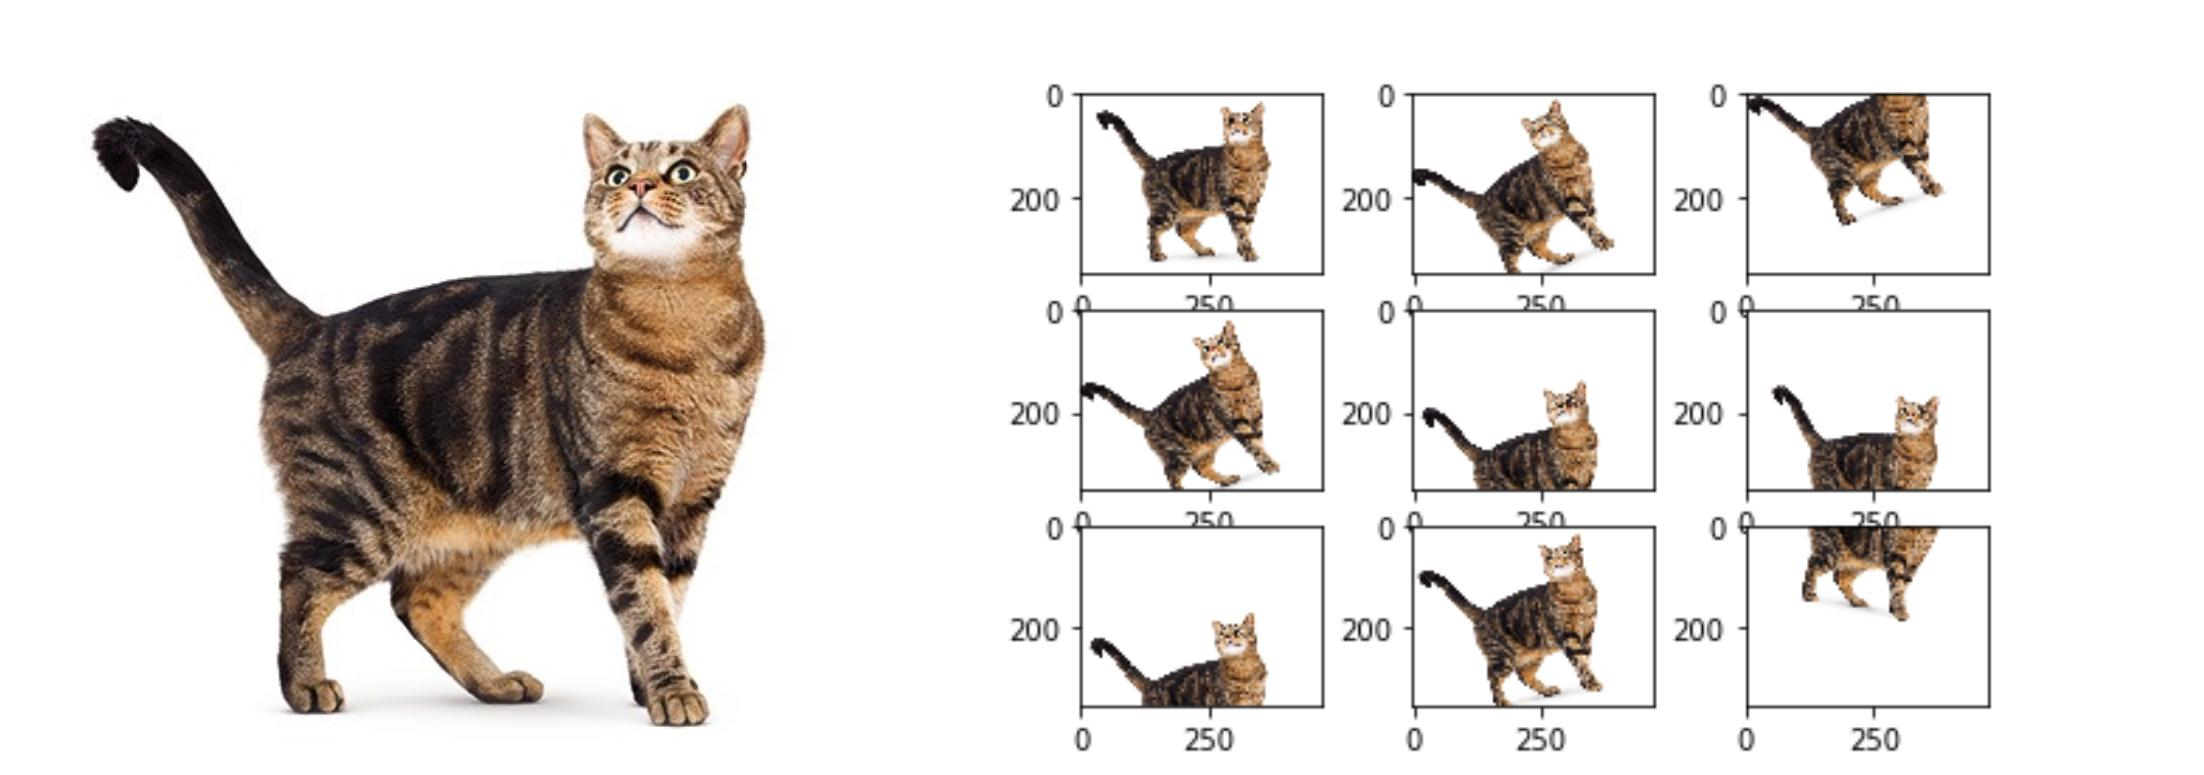


[Also visit this page](https://keras.io/api/preprocessing/image/)

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False, #featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
    samplewise_center=False, # samplewise_center: Boolean. Set each sample mean to 0.
    featurewise_std_normalization=False, # featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
    samplewise_std_normalization=False, # samplewise_std_normalization: Boolean. Divide each input by its std.
    zca_whitening=False, # zca_whitening: Boolean. Apply ZCA whitening.
    zca_epsilon=1e-06, # zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
    rotation_range=15, # rotation_range: Int. Degree range for random rotations.
    width_shift_range=0.1, # shift image horizontally
    height_shift_range=0.1, # shift image vertically
    shear_range=0.3, # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.1, # zoom range 
    channel_shift_range=0.0, # Range for random channel shifts. 
    fill_mode="nearest",
    horizontal_flip=False, # horizontally flip image
    vertical_flip=True, # vertically flip image
    validation_split=0.0,)

datagen.fit(X_train)

# Train the model

In [ ]:
model = Sequential()

model.add(Conv2D(32 , (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , padding = 'same'))

model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = (X_test, y_test))

In [ ]:
score = model.evaluate(X_test, y_test)

# Analyze model

In [ ]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_acc, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Some prediction, if prediction is >= 9, then we will add 1, so, 9 becomes 10... Otherwise it will show wrong...

In [ ]:
predictions = model.predict_classes(X_test)


for i in range(len(predictions)):
    if predictions[i] >= 9:
        predictions[i] += 1
        
predictions[:10]

# inverse labelbinarizer

In [ ]:
y_test_inv_label = encode.inverse_transform(y_test)
y_test_inv_label

# Accuracy check, confusion matrix and classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix(predictions, y_test_inv_label)

In [ ]:
print(accuracy_score(y_test_inv_label, predictions))

In [ ]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
print(classification_report(y_test_inv_label, predictions, target_names=labels))

# Save model

In [ ]:
model.save("hand7.model")

# predict some to check

In [ ]:
import cv2
import tensorflow as tf


labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (28, 28))
    return new_array.reshape(-1, 28, 28, 1)

model = tf.keras.models.load_model("hand7.model")

# predict C sign

In [ ]:
prediction = model.predict_classes([prepare("../input/imagedata/c.png")])
print(labels[prediction[0]])

# predict D hand gesture

In [ ]:
prediction = model.predict_classes([prepare("../input/imagedata/d.png")])
print(labels[prediction[0]])

# Predict N

In [ ]:
prediction = model.predict_classes([prepare("../input/imagedata/n.png")])
print(labels[prediction[0]])

In [ ]:
prediction = model.predict_classes([prepare("../input/imagedata/e.png")])
print(labels[prediction[0]])

In [ ]:
prediction = model.predict_classes([prepare("../input/imagedata/y.png")])
print(labels[prediction[0]])

In [ ]:
prediction = model.predict_classes([prepare("../input/imagedata/a.png")])
print(labels[prediction[0]])